<h1 style="color:rgb(0,162,219); font-family:Arial; font-size:48px;"> WP4 
    Non-Home-based Time Split Improvements </h1>

<p style="color:rgb(0,162,219); font-family:Arial; font-size:16px;">Notebook Information </p>

<table style="color:rgb(88,89,91); font-family:Arial; float:left; font-size:13px; text-align:left;">
    <tr>
        <td style="color:rgb(0,90,132);font-size:13px; text-align:left;"><b>Project</b></td>
        <td style="text-align:left;">NorMITs Demand Partner </td>
    </tr>
    <tr>
        <td style="color:rgb(0,90,132);font-size:13px; text-align:left;"><b>Primary Contact Name</b></td>
        <td style="text-align:left;">Annie Simcock </td>
    </tr>
    <tr>
        <td style="color:rgb(0,90,132);font-size:13px; text-align:left;"><b>Primary Contact Email</b></td>
        <td style="text-align:left;">Anne-Marie.Simcock@atkinsrealis.com </td>
    </tr>
    <tr>
        <td style="color:rgb(0,90,132);font-size:13px; text-align:left;"><b>Document Sensitivity</b></td>
        <td style="text-align:left;"> </td>
    </tr>
</table>

<p style="color:rgb(0,162,219); font-family:Arial; font-size:16px;"> Summary </p>

This Notebook contains the methodology and implementation for deriving the non-home-based time splits within the mdloutput.py script using aggregated National Travel Survey data from the classified build. The current method uses the agg_fill function defined in the mdlbuild.py. Within this function, the time splits are calculated via a sample size row-wise criteria i.e., each datapoint at the purpose, area type, mode, time period level is considered per a 300 trips threshold and the row is then handled accordingly in one of three ways (either calculated by the raw trips split, trips aggregation or TfN area type trips aggregation).

The limitations of the current method are:

- There is inconsistency in approach, for a given purpose, tfn area type, individual time splits can be derived by separate methods. 
- There is no indication in the time split (ts) outputs as to which method was applied to derive each ts.
- As a result of the approach, each purpose, tfn area type combination does not add to 1. This will cause problems in downstream applications. 
- Due to the new TfN area type update (up to 20 types), the current method only refers to area types 1-14 and therefore this is no longer appropriate and should be updated to better reflect the new area type definition
- There are inconsistencies in naming conventions between home-based and non-home-based mts/ts outputs. For the home based MTS, this column is called 'splits', and for the non-home based TS, the column is called 'rho'.

The WP4_EDA Notebook provides more information into the investigation of the ts outputs. 

This new approach aims to improve the process by implementing the following features: 

- Most importantly, ensure that the time splits for each purpose, tfn area type, and mode are constrained to 1.
- Build a model that applies the same method to each 'block' of purpose, tfn area type, mode. 
- Add an audit trail column to the ts outputs that outlines which data aggregation method was used to derive the time splits for each block.
- Determine a proportionate trips threshold to use to define the cut off for each aggregation method. 
- Define and implementation suitable aggregations of TfN area types for all 20 new TfN area types.
- Consistency in naming convention of the 'splits' column.


<table style="color:rgb(88,89,91); font-family:Arial; float:left; font-size:13px; text-align:left;">
    <tr>
        <th style="color:rgb(0,90,132); text-align:left;">Version</th>
        <th style="color:rgb(0,90,132); text-align:left;">Originated</th>
        <th style="color:rgb(0,90,132); text-align:left;">Date</th>
        <th style="color:rgb(0,90,132); text-align:left;">Comments</th>
        <th style="color:rgb(0,90,132); text-align:left;">Checked</th>
        <th style="color:rgb(0,90,132); text-align:left;">Date</th>
        <th style="color:rgb(0,90,132); text-align:left;">Comments</th>
    </tr>
    <tr>
    <tr>
        <td style="text-align:left;">v0.1</td>
        <td style="text-align:left;">AS</td>
        <td style="text-align:left;">10/04/2024</td>
        <td style="text-align:left;">Originator, added initial model build, hh only build and then the full model with tfn_at aggregatation with visualisations.</td>
        <td style="text-align:left;">RM </td>
        <td style="text-align:left;">23/05/2024</td>
        <td style="text-align:left;"> </td>        
    <tr>        
        <td style="text-align:left;">v0.2</td>
        <td style="text-align:left;">AS</td>
        <td style="text-align:left;">23/04/2024</td>
        <td style="text-align:left;">Addressing comments</td>
        <td style="text-align:left;">RM</td>
        <td style="text-align:left;">29/05/2024</td>
        <td style="text-align:left;"> </td>
    </tr>
    <tr>
        <td style="text-align:left;">v0.3</td>
        <td style="text-align:left;">LP</td>
        <td style="text-align:left;">06/04/2024</td>
        <td style="text-align:left;">Updated to nhb mode-time splits, excluded household type</td>
        <td style="text-align:left;">RM</td>
        <td style="text-align:left;">06/06/2024</td>
        <td style="text-align:left;"> </td>
    </tr>
    <tr>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
    </tr>
    <tr>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
    </tr>
    <tr>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
        <td style="text-align:left;"> </td>
    </tr>
</table>

<p style="color:rgb(0,162,219); font-family:Arial; font-size:16px;">Contents </p>

[1. Preliminaries and Inputs](#Preliminaries-and-Inputs)<br>
[2. Pre-Processing Steps](#Pre-Processing-Steps)<br>
[3. Model Information](#Model-Information)<br>
[4. Full Model Build](#Full-Model-Build)<br>

## Preliminaries and Inputs

This section imports the python packages which are required and reads in the input to the agg_fill function which is our starting point. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#read in the dataframe which is the input into agg_fill
dfr_input_fldr = r'I:\NTS\NorMITs Demand WP4\Jupyter Notebooks\inputs\_mts_nhbase'
df = pd.read_csv(dfr_input_fldr + r'\dfr_nhbase_split_before.csv').rename(columns={'tfn_at_o':'tfn_at'})
df = df[['purpose','tfn_at','hh_type','mode','period','trips']]
#aggregate over hh_type
df = df.groupby(['purpose','tfn_at','mode','period'])['trips'].sum().reset_index()
df

,purpose,tfn_at,mode,period,trips
0,1,1,1,1,428.513415
1,1,1,1,2,4015.456509
2,1,1,1,3,194.121339
3,1,1,1,4,42.275151
4,1,1,1,5,109.495402
...,...,...,...,...,...
7675,8,20,8,2,2.790672
7676,8,20,8,3,3.452028
7677,8,20,8,4,1.036946
7678,8,20,8,5,0.000000


## Pre-Processing Steps

This section removes mode 8 (air travel) from the trips dataframe as agreed due to low to no trip sample. 

At the p,at,mode level, we sum over the trips column to calculate a total number of trips for this 'block'. We use this to calculate the raw proportion of trips (split) that is asscociated with each mode-time period combination to create the 'split' column. 

Based on the total trips at each p,at,mode level we assign the split_method column based on whether the total trips is above or below 100 trips. If trips>100 we assign the split method as 'observed' indicating that we will using the observed ts, otherwise we assign 'TBD' as the split needs to be determined via the modelling process. 

Please consult the EDA notebook for analysis on the distribution of total trips per p,at,m block above 100. This justifies the use of the 100 trip threshold. 

In [3]:
#The decision to remove mode 8 (air travel) from the mode was made.
df = df[df['mode'] != 8] 

#calculate the total trips at the p,at,hh level
df_total = df.groupby(['purpose','tfn_at','mode']).sum()
df_total = df_total[['trips']].reset_index()


#determine whether the combination needs to be modelled or the raw splits can be used, if trips>100 use observed trips to derive splits
df_total['split_method'] = np.where(df_total.trips>=100, 'observed', 'TBD')
df_total = df_total.rename(columns={'trips': 'total_trips'})


#calculate the raw split (trips/(total trips at the p,at,hh,m level))
df_trip_join = pd.merge(df, df_total, left_on =['purpose','tfn_at','mode'] , right_on = ['purpose','tfn_at','mode'], how='inner')
df_trip_join['split'] = df_trip_join['trips'] / df_trip_join['total_trips']
df_trip_join = df_trip_join[['purpose','tfn_at','mode', 'period','split','trips','total_trips','split_method']]
#df_trip_join['mode_period'] = df_trip_join['mode'].astype(str) + '_' + df_trip_join['period'].astype(str)
#df_trip_join.to_csv('trip_join.csv')
df_trip_join

,purpose,tfn_at,mode,period,split,trips,total_trips,split_method
0,1,1,1,1,0.088927,428.513415,4818.688167,observed
1,1,1,1,2,0.833309,4015.456509,4818.688167,observed
2,1,1,1,3,0.040285,194.121339,4818.688167,observed
3,1,1,1,4,0.008773,42.275151,4818.688167,observed
4,1,1,1,5,0.022723,109.495402,4818.688167,observed
...,...,...,...,...,...,...,...,...
6715,8,20,7,2,0.611740,1.719218,2.810372,TBD
6716,8,20,7,3,0.000000,0.000000,2.810372,TBD
6717,8,20,7,4,0.000000,0.000000,2.810372,TBD
6718,8,20,7,5,0.388260,1.091154,2.810372,TBD


## Model Information

### Modelling Approach
The approach is to calculate the mode-time splits via a sample size “block”-wise criteria i.e., total trips across a single purpose, area type, mode are considered per a threshold and the “block” is then handled accordingly.

In instances where total trips for the block are above the threshold, we assume that a low number of trips for a mode-time combination within the block indicates that this combination isn’t popular (rather than there being low sample size for that specific mode-time). 

- For trips above threshold we calculate time split directly off the datapoints for that block.

- For total trips below threshold, we combine the blocks using aggregation hierarchy i.e., by similar area types.

We build a model using multiple datapoints per time combination to give a synthetic trip/split profile to calculate time split from. 


### Purpose of the model
The purpose of the model is to create a synthetic profile for the time splits for combinations of purpose, TfN area type where the NTS trips sample is below a threshold. To do this we need to use aggregation hierarchy of TfN area type to build a combined profile of time splits.

This requires us to filter down to the relevant purpose, TfN area type, mode level as including other combinations of these would impact the profile and may not be representative of the combination we are looking to model. The biggest factor is purpose, adding in different purposes into the training dataset makes the ts much higher or lower than the individual datapoints. 

After conducting an investigation to determine the best model form to approach this problem we have chosen to use linear regression model to 'fit' the trip proportions/splits of similar TfN area types. Other algorithms and ML approaches have been considered and ruled out based on suitability, proportionality, and success model fitting in inital model builds for the home-based implementation. A main factor in this decision is the shape and size of the dataset (number of features to the number of datapoints) and the proportionality of the approach to the problem.  

Weighting against blocks which have a larger sample of trips has been considered within this work package and discussions have been conducted. At this time, no decision has been taken to implement this in the model build due to caution raised about  adding bias into the process.


## Full Model Build


### Model build with TfN area type aggregation hierarchies

- Apply the model to combinations with trip samples for the combined aggregation less than 100, aggregation by TfN area type. 

### TfN Area Type Aggregations

#### Rationale for choosing the new TfN aggregations. 

- Firstly, we reviewed TfN Area Type aggregations that were used previously. There were separate groupings for London, Major & Minor, Cities by geographical split and Rural as these result in different trip distributions across modes and time due to the nature of the area types. These aggregation categories should be retained.

- The additional new area types included categories such as Town and Scotland.  

- Next we reviewed the WP1 area type groupings analysis, it was determined that v1 of the groupings was closer to the original aggregations set. In this grouping, Town, Rural and Scotland area types were all grouped separately whilst all Cities were aggregated together and Major & Minor plus London were aggregated together.

- Therefore, we have used a combination of the existing area type grouping definitions and aggregations explored by WP1 for brand new defined area types to produce the following TfN area type groupings:

    - London - 1,2
    - Major and Minor - 3,4,5,6,7,8
    - City South -  9,10,11
    - City Midland - 12,13
    - City North - 14,15
    - Town - 16,17
    - Rural - 18,19
    - Scotland - 20
    
These groupings can be amended manually by updating the dictionary in the cell below.

In [4]:
df_trip_join = df_trip_join.fillna(0) #ensure that the target variable y (splits) always has a value
audit_df = pd.DataFrame(columns = ['purpose', 'mode', 'area_type','total_trips', 'status'])

#define aggregation hierarchies for new TfN area type
tfn_at = {1: [1, 2], 2: [1, 2], 3: [3, 4, 5, 6, 7, 8], 4: [3, 4, 5, 6, 7, 8], 5: [3, 4, 5, 6, 7, 8], 6: [3, 4, 5, 6, 7, 8], 7: [3, 4, 5, 6, 7, 8], 8: [3, 4, 5, 6, 7, 8], 
          9: [9, 10, 11], 10: [9, 10, 11], 11: [9, 10, 11], 12: [12, 13], 13: [12, 13], 14: [14, 15], 15: [14, 15], 16: [16, 17],  
          17: [16, 17],18: [18, 19] ,19: [18, 19], 20: [20]}
#list_hh_type = [[1,3,6], [2,5,8], [4,7]]
modelled_df = pd.DataFrame()
modelled_at = pd.DataFrame()
for p in range(1,9):
    for at in range (1,21):
        for m in range(1,8):
            df_mode_period_join_f = df_trip_join[(df_trip_join['purpose']==p) &(df_trip_join['mode']==m) &(df_trip_join['tfn_at']==at)]
            df_mode_period_join_hh = df_mode_period_join_f
            
            needs_pred = df_mode_period_join_hh[df_mode_period_join_hh.split_method == 'TBD']
            trips = df_mode_period_join_hh.total_trips.unique().sum()

            if not needs_pred.empty:
                data_df = [[p, m, at, trips, 'Need tfn_at aggregation']]
                audit_df = audit_df.append(pd.Series(data_df[0], index=audit_df.columns), ignore_index=True)
                df_period_join_at = df_trip_join[(df_trip_join['purpose']==p)]
                df_period_join_at = df_period_join_at[(df_period_join_at['mode']==m)]
                df_period_join_at = df_period_join_at[df_period_join_at.tfn_at.isin(tfn_at[at])] 
                        
                X_train_cat = df_period_join_at[['purpose','period', 'mode']]
                X_train_prob = df_period_join_at[['split']]

                # Encode categorical features using one-hot encoding
                encoder = OneHotEncoder(sparse=False)
                X = encoder.fit_transform(X_train_cat)

                y = X_train_prob['split'].reset_index()
                y = np.array([y['split']]).T

                # Initialize and train the model
                model = LinearRegression()
                model.fit(X, y)

                X_predictor = encoder.fit_transform(X_train_cat.drop_duplicates())
                y_predicted_new_data = model.predict(X_predictor)

                m_p = X_train_cat.drop_duplicates()[['period']]

                df_predict = pd.DataFrame(y_predicted_new_data)
                df_model = df_predict.rename(columns={0: 'modelled'})
                df_model = df_model.clip(lower = 0)

                df_model['purpose'] = p
                df_model['mode'] = m
                df_model = df_model.reset_index()
                m_p = m_p.reset_index()
                df_model['period'] = m_p['period']
                # store DataFrame in list
                df_model['split_method'] =str(tfn_at[at])

                #store df 
                modelled_at= pd.concat([modelled_at, df_model])
                modelled_at = modelled_at.drop_duplicates()
            else:
                data_df = [[p, m, at, trips, 'No aggregation all hh types above 100 trips individually']] 
                audit_df = audit_df.append(pd.Series(data_df[0], index=audit_df.columns), ignore_index=True)

#add column describing the method used to derive the splits
modelled_at['modelled'] = modelled_at['modelled'].clip(lower = 0)
modelled_df = modelled_at[['period','purpose', 'mode','modelled', 'split_method']]
modelled_df =modelled_df.assign(tfn_at=modelled_df['split_method'].str.strip('[]').str.split(',')).explode('tfn_at').reset_index(drop=True)
modelled_df.tfn_at = modelled_df.tfn_at.astype(int)
modelled_df_groupby = modelled_df.groupby(['purpose','tfn_at','mode']).sum().rename(columns={'modelled': 'sum of modelled'}).reset_index()

#constraining the mts to 1 to created the adjusted rho column
all_modelled_at = pd.merge(modelled_df, modelled_df_groupby, how='inner', on = ['purpose','tfn_at','mode'])
all_modelled_at['adjusted_split'] = all_modelled_at['modelled'] / all_modelled_at['sum of modelled']
all_modelled_at = all_modelled_at[['period_x','purpose','tfn_at','mode', 'split_method', 'adjusted_split']]
all_modelled_at = all_modelled_at.rename(columns={'period_x': 'period'})
all_modelled_at = all_modelled_at.fillna(0)
all_modelled_at = all_modelled_at.drop_duplicates()   

#create the split column that defined which hh type agg method would be needed
df_trip_join_hh = df_trip_join[['purpose','tfn_at','period','mode', 'split', 'split_method']]
df_trip_join_hh = df_trip_join_hh[df_trip_join_hh.split_method == 'TBD']
df_trip_join_hh = df_trip_join_hh.rename(columns={'split_method': 'split_needed'})

df_trip_join_ob = df_trip_join[['purpose','tfn_at','period','mode', 'split', 'split_method']]
df_trip_join_ob = df_trip_join_ob[df_trip_join_ob.split_method == 'observed']
df_trip_join_ob = df_trip_join_ob.rename(columns={'split_method': 'split_needed'})

#merge the observed and modelled information together into a final dataframe
resultant_df_hh = pd.merge(df_trip_join_hh, all_modelled_at, left_on=['purpose', 'tfn_at','period','mode'], right_on=['purpose', 'tfn_at','period','mode'], how = 'left')
resultant_df_at = resultant_df_hh[resultant_df_hh.split_method.isnull()]
resultant_df_hh = resultant_df_hh[resultant_df_hh.split_method.notnull()]

resultant_df_at = resultant_df_at[['purpose','tfn_at','period','mode','split', 'split_needed']]
resultant_df_2 = pd.merge(resultant_df_at, all_modelled_at, left_on=['purpose', 'tfn_at','period','mode'], right_on=['purpose', 'tfn_at','period','mode'], how = 'left')
resultant_df = pd.concat([resultant_df_hh,resultant_df_2])
resultant_df_final = pd.concat([resultant_df, df_trip_join_ob])

resultant_df_final['split_final'] = np.where(resultant_df_final['split_needed'] == 'TBD', resultant_df_final['adjusted_split'], resultant_df_final['split'])

resultant_df_final = resultant_df_final.drop_duplicates()
#resultant_df_final.to_csv('mts_output.csv')
#audit_df.to_csv('all_audit_output.csv')
resultant_df_final

,purpose,tfn_at,period,mode,split,split_needed,split_method,adjusted_split,split_final
0,1,1,1,4,0.273879,TBD,"[1, 2]",0.238384,0.238384
1,1,1,2,4,0.359702,TBD,"[1, 2]",0.420081,0.420081
2,1,1,3,4,0.149024,TBD,"[1, 2]",0.117852,0.117852
3,1,1,4,4,0.143171,TBD,"[1, 2]",0.140597,0.140597
4,1,1,5,4,0.056285,TBD,"[1, 2]",0.060784,0.060784
...,...,...,...,...,...,...,...,...,...
6703,8,20,2,5,0.430017,observed,NaN,NaN,0.430017
6704,8,20,3,5,0.121180,observed,NaN,NaN,0.121180
6705,8,20,4,5,0.079132,observed,NaN,NaN,0.079132
6706,8,20,5,5,0.157153,observed,NaN,NaN,0.157153


#### Visualisations of the model to evaluate performance (tfn area type aggregation)

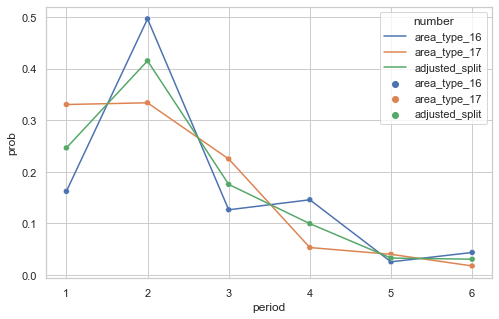

In [9]:
p= 1
m= 4

df_hh = df_trip_join[df_trip_join.tfn_at.isin([16,17])]
df_mode_period_join_f = df_hh[(df_hh['purpose']==p) &(df_hh['mode']==m)]

#create the dataframe which has the observed splits to compare against
comparison_df = df_mode_period_join_f.pivot_table(index=['purpose','tfn_at','mode'], columns='period', values='split', aggfunc='sum', fill_value=0).reset_index()
pivot_df_T = comparison_df.T.reset_index().loc[3::]
pivot_df_T['purpose'] = p
pivot_df_T['mode'] = m
df_model = all_modelled_at[(all_modelled_at['purpose']==p) &(all_modelled_at['mode']==m) &(all_modelled_at['split_method']==str([16,17]))]
    
if not df_model.empty:
    join_model_obs = pd.concat([pivot_df_T.reset_index(), df_model.reset_index()['adjusted_split']], axis=1)
    join_model_obs = join_model_obs.rename(columns={0: 'area_type_' + str(16)})
    join_model_obs = join_model_obs.rename(columns={1: 'area_type_' + str(17)})
    join_model_obs = join_model_obs[['period', 'area_type_' + str(16), 'area_type_' + str(17), 'adjusted_split']]

    #plot the observed vs modelled
    dfm = pd.melt(join_model_obs, id_vars="period", var_name="number", value_name="prob")

    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    ax = sns.scatterplot(x='period', y='prob', hue='number', data=dfm)
    ax = sns.lineplot(x='period', y='prob', hue='number', data=dfm)
    #ax.spines[['top', 'right']].set_visible(False)
    #sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)

## Future Improvements

A potential improvement is to wrap commonly used sections of the code (model build, fitting and prediction code, post-processing) into functions to streamline the codebase, enable code reuse and to avoid additional effort in codebase management. 